In [1]:
#import libraries
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
#Load Data
x = pd.read_csv("compresive_strength_concrete.csv")
x.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
#Check Missing Values
x.isnull().sum()
x.isnull().any()

Cement (component 1)(kg in a m^3 mixture)                False
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    False
Fly Ash (component 3)(kg in a m^3 mixture)               False
Water  (component 4)(kg in a m^3 mixture)                False
Superplasticizer (component 5)(kg in a m^3 mixture)      False
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     False
Fine Aggregate (component 7)(kg in a m^3 mixture)        False
Age (day)                                                False
Concrete compressive strength(MPa, megapascals)          False
dtype: bool

In [5]:
x.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [7]:
x.shape

(1030, 9)

In [8]:
#Split x data into features and strength
features = x.iloc[:,:-1]
strength = x.iloc[:,-1:]
features.shape
strength.shape

(1030, 1)

In [9]:
#Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
from sklearn.model_selection import train_test_split
train_features,test_features,train_strength,test_strength = train_test_split(features,strength,test_size=0.3,random_state=0)


In [10]:
#Normalization/Standardized the Input Variables.
mean = train_features.mean(axis=0)
train_features -= mean
std = train_features.std(axis=0)
train_features /= std
test_features -= mean
test_features /= std
train_features.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
772,0.973719,-0.869834,-0.828786,0.226236,-1.054290,0.969500,-0.451384,-0.608590
997,0.287761,0.743415,-0.828786,-0.623303,0.628150,-0.732770,0.356299,-0.283867
724,0.287761,-0.869834,-0.828786,0.507851,-1.054290,0.520521,0.679372,0.674839
167,1.859747,0.472280,-0.828786,-0.003750,0.443081,-1.530668,0.076716,0.690302
764,1.002300,-0.869834,-0.828786,0.226236,-1.054290,-0.069565,-0.153162,-0.670442


In [11]:
#Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
#Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
from keras import models,layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10,activation="relu",input_shape=(features.shape[1],)))
    model.add(layers.Dense(8,activation="relu"))
    model.add(layers.Dense(6,activation="relu"))
    model.add(layers.Dense(1))
    model.compile(optimizer="rmsprop",loss = "mse",metrics = ["mae"])
    return model

In [12]:
#Train the Model with Epochs (100) and validate it
model = build_model()
history = model.fit(train_features,train_strength, batch_size=2, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
288/288 [==============================] - 1s 1ms/step - loss: 1536.2887 - mae: 35.5173 - val_loss: 1409.9587 - val_mae: 33.0941
Epoch 2/100
288/288 [==============================] - 0s 1ms/step - loss: 1249.8864 - mae: 30.8300 - val_loss: 681.4782 - val_mae: 21.1116
Epoch 3/100
288/288 [==============================] - 0s 976us/step - loss: 552.9158 - mae: 18.4141 - val_loss: 321.5876 - val_mae: 14.3395
Epoch 4/100
288/288 [==============================] - 0s 941us/step - loss: 290.4804 - mae: 13.7121 - val_loss: 220.0090 - val_mae: 11.8504
Epoch 5/100
288/288 [==============================] - 0s 1ms/step - loss: 195.7142 - mae: 11.3037 - val_loss: 179.4178 - val_mae: 10.7206
Epoch 6/100
288/288 [==============================] - 0s 976us/step - loss: 173.9041 - mae: 10.7438 - val_loss: 158.8097 - val_mae: 10.0374
Epoch 7/100
288/288 [==============================] - 0s 905us/step - loss: 163.1587 - mae: 10.0789 - val_loss: 148.5131 - val_mae: 9.6500
Epoch 8/100
288/2

Epoch 60/100
288/288 [==============================] - 0s 923us/step - loss: 34.5025 - mae: 4.4427 - val_loss: 45.9408 - val_mae: 5.2229
Epoch 61/100
288/288 [==============================] - 0s 958us/step - loss: 30.1817 - mae: 4.2261 - val_loss: 46.0573 - val_mae: 5.1714
Epoch 62/100
288/288 [==============================] - 0s 940us/step - loss: 29.3664 - mae: 4.0777 - val_loss: 50.0158 - val_mae: 5.4116
Epoch 63/100
288/288 [==============================] - 0s 906us/step - loss: 28.3505 - mae: 4.0262 - val_loss: 45.1617 - val_mae: 5.1553
Epoch 64/100
288/288 [==============================] - 0s 939us/step - loss: 33.1859 - mae: 4.3528 - val_loss: 47.0780 - val_mae: 5.2238
Epoch 65/100
288/288 [==============================] - 0s 871us/step - loss: 33.4170 - mae: 4.3803 - val_loss: 48.2203 - val_mae: 5.2700
Epoch 66/100
288/288 [==============================] - 0s 904us/step - loss: 32.8423 - mae: 4.3333 - val_loss: 47.3860 - val_mae: 5.0844
Epoch 67/100
288/288 [============

In [13]:
#Evaluation Step
train_mse,train_mae = model.evaluate(train_features, train_strength, verbose=0)
test_mse,test_mae = model.evaluate(test_features, test_strength, verbose=0)
print(train_mse,train_mae,test_mse,test_mae)

30.398622512817383 4.046905994415283 37.918731689453125 4.563307762145996


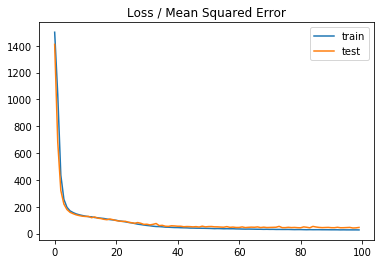

In [14]:
#plotting
import matplotlib.pyplot as plt
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [16]:
#Evaluation Step
loss,acc = model.evaluate(test_features,test_strength) 

10/10 [==============================] - 0s 0s/step - loss: 37.9187 - mae: 4.5633


In [18]:
#Prediction
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = model.predict(train_features)
print(np.sqrt(mean_squared_error(train_strength,pred_train)))

pred = model.predict(test_features)
print(np.sqrt(mean_squared_error(test_strength,pred)))

5.513494396784617
6.157818736007991
